In [13]:
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#http://inmachineswetrust.com/posts/exploring-pokemon-dataset/

In [3]:
df = pd.read_csv('pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 66.4+ KB


In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
df.rename(columns={'#': 'id'}, inplace=True)
df.columns = df.columns.str.lower()

In [7]:
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
df[df.duplicated('id', keep=False)].head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [9]:
df.drop_duplicates('id', keep='first', inplace=True)

In [10]:
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [11]:
df['type 2'].fillna(value='None', inplace=True)

In [12]:
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


In [23]:
dex = df[['id','name','type 1','type 2','generation','legendary']]

In [24]:
dex.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,None,1,False
5,5,Charmeleon,Fire,None,1,False


In [25]:
stats = df[['id','hp','attack','defense','sp. atk','sp. def','speed','total']]

In [26]:
stats.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405


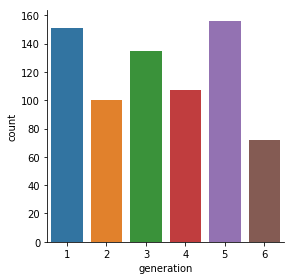

In [29]:
sns.factorplot(x='generation',data=dex, kind='count')

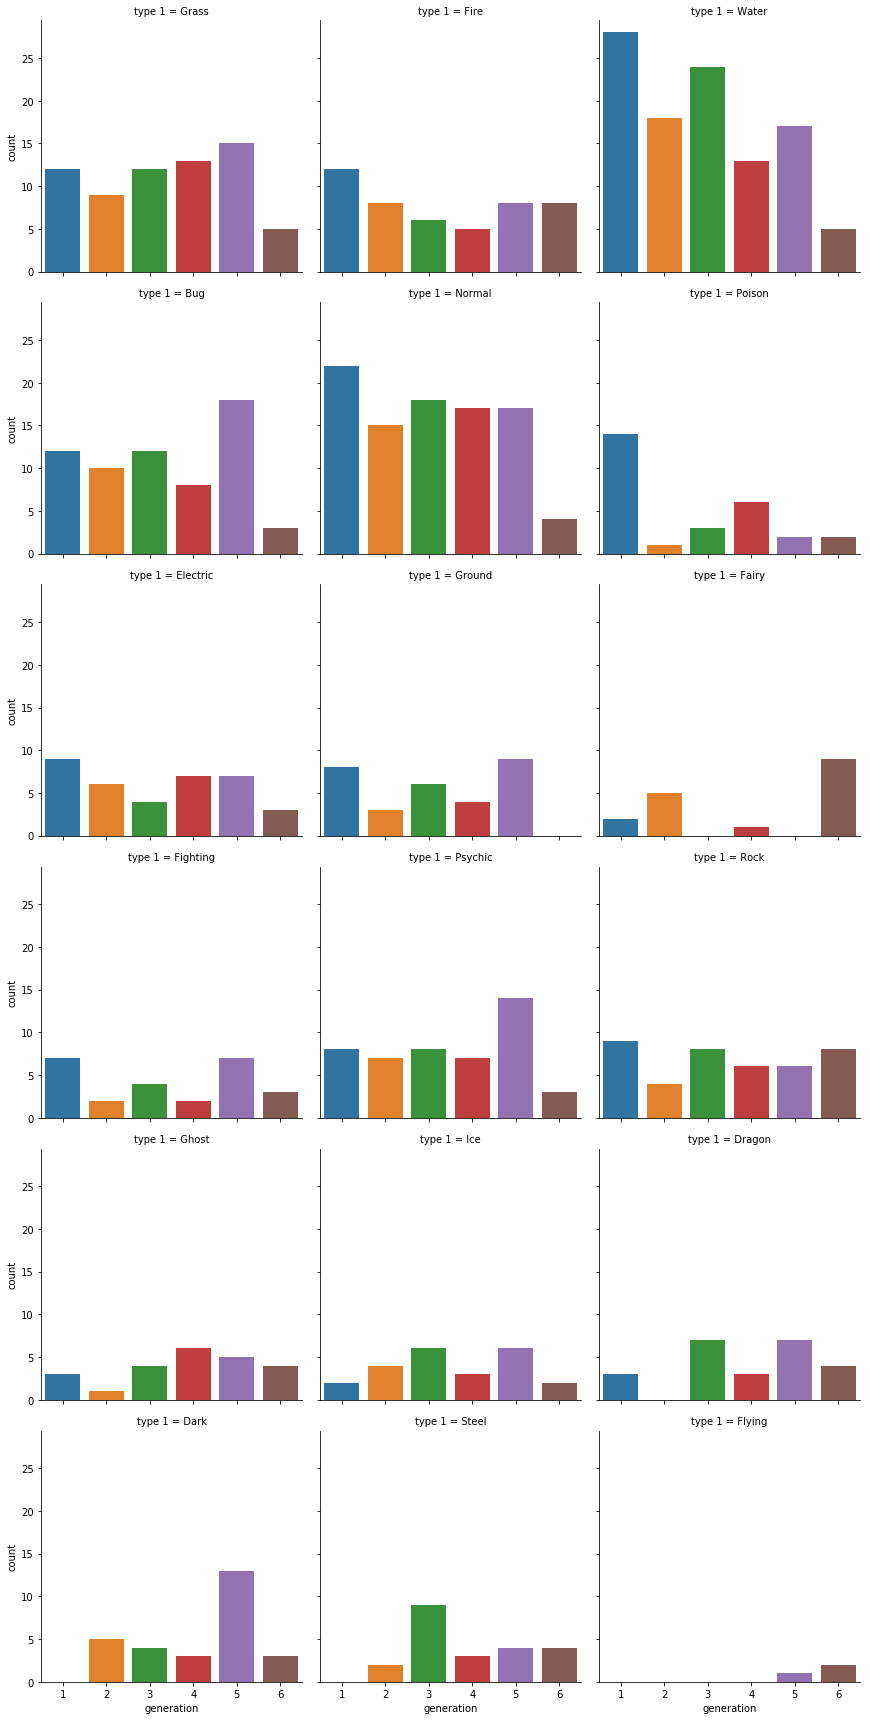

In [32]:
sns.factorplot(x='generation',data=dex,kind='count',col='type 1',col_wrap=3)

In [37]:
np.setdiff1d(dex['type 1'],dex['type 2'])

array([], dtype=object)

In [41]:
np.setdiff1d(dex['type 2'],dex['type 1'])

array(['None'], dtype=object)

In [42]:
pokedex=dex

In [50]:
unique_type1 = np.setdiff1d(pokedex['type 1'], pokedex['type 2'])
unique_type2 = np.setdiff1d(pokedex['type 2'], pokedex['type 1'])

print('Unique Type 1: ')
if unique_type1.size == 0:
    print('No unique types')
else:
    for u in unique_type1:
        print(u)
        
print('Unique Type 2: ')
if unique_type2.size == 0:
    print('No unique types')
else:
    for u in unique_type2:
        print(u)

Unique Type 1: 
No unique types
Unique Type 2: 
None


In [54]:
pokedex.groupby('type 2').count()['id']

type 2
Bug           3
Dark         16
Dragon       14
Electric      6
Fairy        18
Fighting     19
Fire          9
Flying       87
Ghost        12
Grass        18
Ground       30
Ice          10
None        371
Normal        4
Poison       31
Psychic      27
Rock         14
Steel        19
Water        13
Name: id, dtype: int64

In [55]:
type1, type2 = pokedex.groupby('type 1'), pokedex.groupby('type 2')
print('Type 1 count: {}'.format(len(type1)))
print('Type 2 count: {}'.format(len(type2)))

Type 1 count: 18
Type 2 count: 19


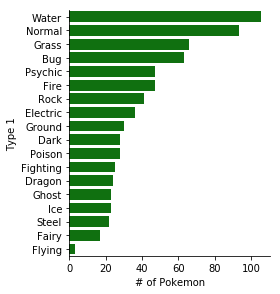

In [96]:
sns.factorplot(
    y='type 1',
    data=pokedex,
    kind='count',
    aspect=1,
    order=pokedex['type 1'].value_counts().index,
    color='green',
).set_axis_labels('# of Pokemon', 'Type 1')

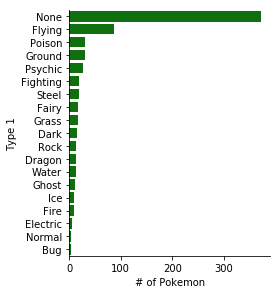

In [97]:
sns.factorplot(
    y='type 2',
    data=pokedex,
    kind='count',
    order=pokedex['type 2'].value_counts().index,
    color='green',
).set_axis_labels('# of Pokemon', 'Type 1')

In [87]:
dual_types = pokedex[pokedex['type 2'] != 'None']
dual_types.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
6,6,Charizard,Fire,Flying,1,False
15,12,Butterfree,Bug,Flying,1,False


In [88]:
dual_types.groupby(['type 1', 'type 2']).size().head(10)

type 1  type 2  
Bug     Electric     2
        Fighting     1
        Fire         2
        Flying      13
        Ghost        1
        Grass        6
        Ground       1
        Poison      11
        Rock         3
        Steel        5
dtype: int64

In [89]:
dual_types.groupby(['type 1', 'type 2']).size().unstack()

type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
type 1,,,,,,,,,,,,,,,,,,
Bug,NaN,NaN,NaN,2.0,NaN,1.0,2.0,13.0,1.0,6.0,1.0,NaN,NaN,11.0,NaN,3.0,5.0,1.0
Dark,NaN,NaN,3.0,NaN,NaN,2.0,2.0,5.0,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN
Dragon,NaN,NaN,NaN,1.0,NaN,NaN,1.0,4.0,NaN,NaN,4.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN
Electric,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN
Fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighting,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
Fire,NaN,NaN,NaN,NaN,NaN,6.0,NaN,5.0,NaN,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0
Flying,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ghost,NaN,1.0,1.0,NaN,NaN,NaN,3.0,2.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


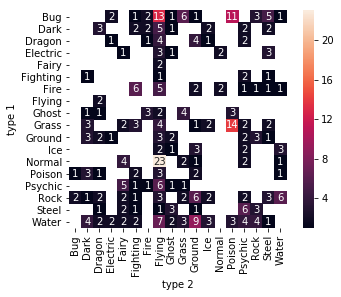

In [98]:
sns.heatmap(dual_types.groupby(['type 1', 'type 2']).size().unstack(),annot=True,square=True,)